## Importing Libraries

In [1]:
## Pandas and Numpy

import pandas as pd
import numpy as np

## Plotting libraries

import matplotlib.pyplot as plt
import seaborn as sns

## Ignore warnings

import warnings
warnings.filterwarnings('ignore')

## Stats Libraries

from scipy.stats import zscore

## Machine Learning Libraries

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

## Importing the dataset

In [2]:
df = pd.read_csv("Part4 - batting_bowling_ipl_bat.csv")

In [3]:
## Checking shape and the top rows of the dataframe

df.shape

(180, 7)

In [4]:
df.head(10)

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0


In [5]:
## Dropping NA values

df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [7]:
df

,Name,Runs,Ave,SR,Fours,Sixes,HF
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0
...,...,...,...,...,...,...,...
171,Z Khan,12.0,6.00,70.58,1.0,0.0,0.0
173,WD Parnell,19.0,4.75,70.37,2.0,0.0,0.0
175,PC Valthaty,30.0,5.00,58.82,4.0,0.0,0.0
177,RP Singh,6.0,3.00,50.00,0.0,0.0,0.0


## EDA and Visualization

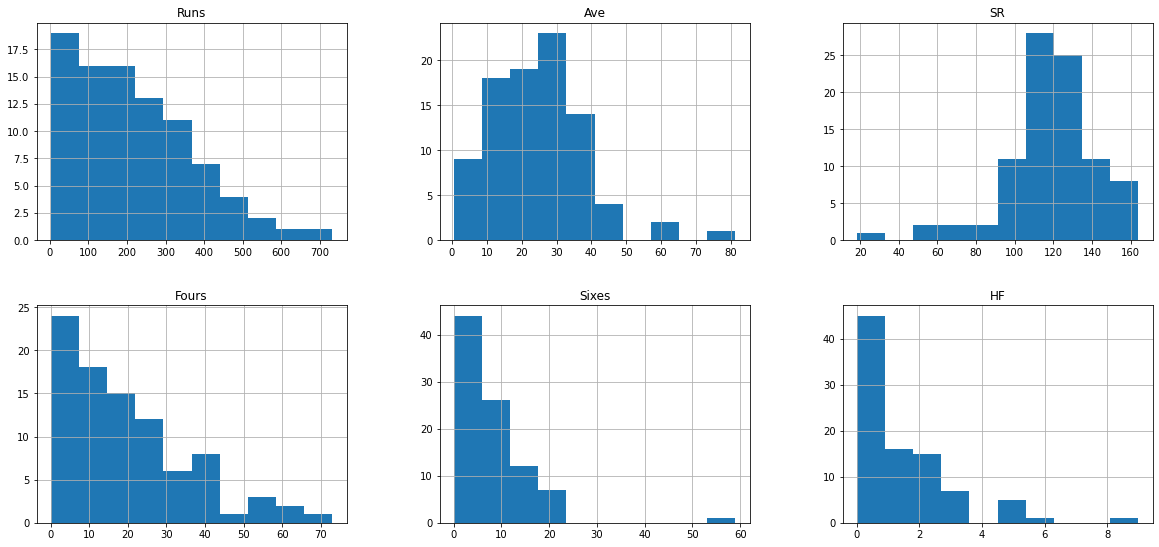

In [8]:
## Checking distributions of the variables

df.hist(layout= (6,3), figsize=(20,30));

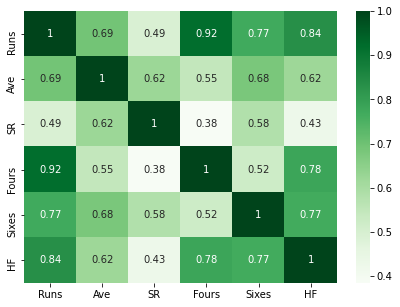

In [9]:
## Checking correlations between variables

plt.subplots(figsize=(7,5))
sns.heatmap(df.corr(), annot=True, cmap = 'Greens' )

plt.show()

##### We see a strong positive correlation amongst most factors.

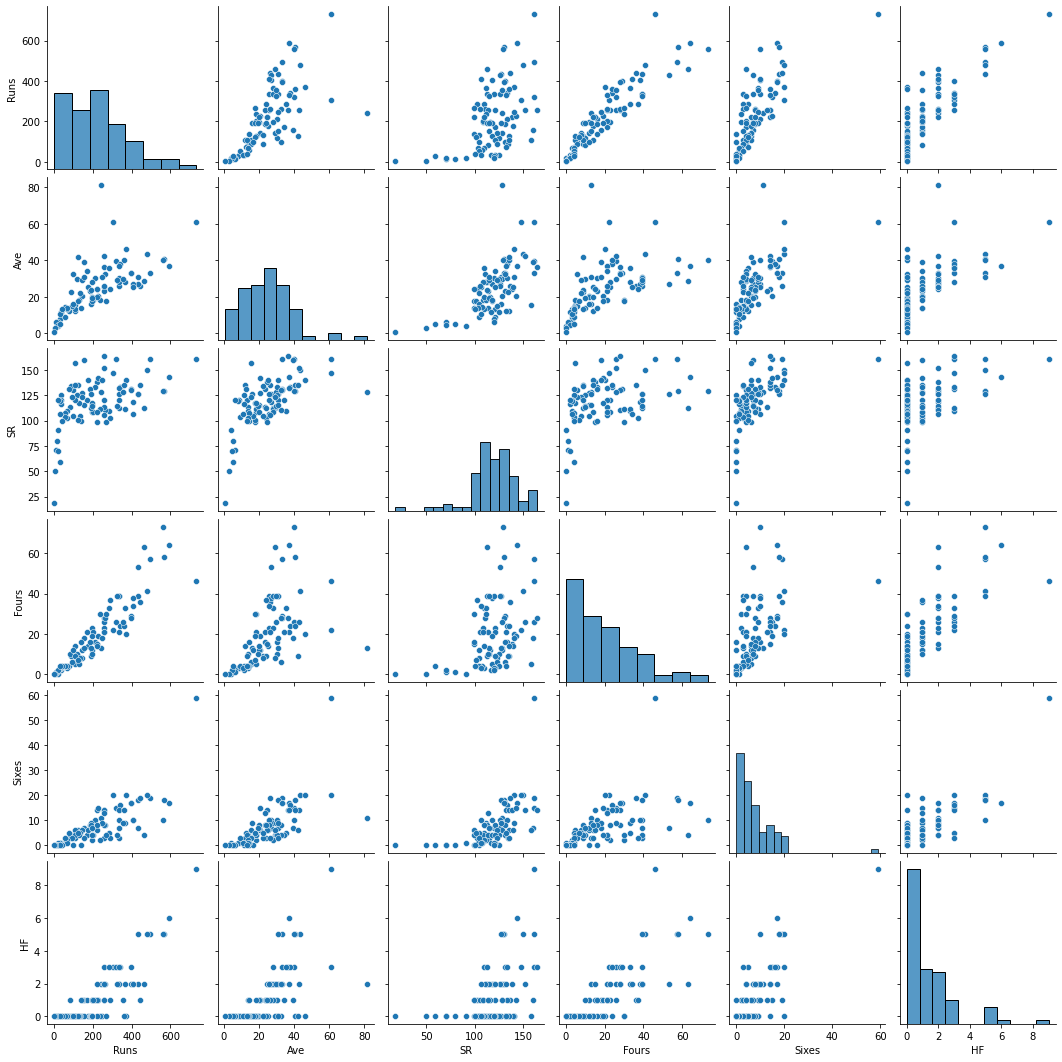

In [10]:
sns.pairplot(df);

##### Through the pair plot we see that for some variable combinations where the correlation is not as high as others, we see a non linear relationship

## Implementing PCA

In [11]:
## Creating a dataframe with scaled values and without the Names

dfscaled = df.iloc[:,1:].apply(zscore)

In [12]:
dfscaled.head()

,Runs,Ave,SR,Fours,Sixes,HF
1,3.301945,2.683984,1.767325,1.607207,6.462679,4.651551
3,2.381639,0.896390,1.036605,2.710928,1.184173,2.865038
5,1.770248,0.610640,1.788154,2.281703,1.435530,2.269533
7,1.667276,1.388883,1.297182,1.300618,1.561209,2.269533
9,2.246490,1.174755,0.444038,2.343021,1.309851,2.269533


##### Printing the covariance matrix.
the values are rounded off for easier reading

In [13]:
covMatrix = np.cov(dfscaled,rowvar = False)
print(np.round(covMatrix,2))

[[1.01 0.7  0.5  0.93 0.78 0.84]
 [0.7  1.01 0.63 0.55 0.69 0.63]
 [0.5  0.63 1.01 0.39 0.59 0.43]
 [0.93 0.55 0.39 1.01 0.53 0.79]
 [0.78 0.69 0.59 0.53 1.01 0.78]
 [0.84 0.63 0.43 0.79 0.78 1.01]]


##### Choosing 4 components

In [14]:
pca = PCA(n_components=4)
pca.fit(dfscaled)

PCA(n_components=4)

In [15]:
print(np.round(pca.explained_variance_ratio_,2))

[0.71 0.14 0.07 0.05]


##### Approximately 97% of the variation is explained by the 4 components

##### 


##### Displaying the Eigenvalues and Eigenvectors

In [16]:
eigenvalues = pca.explained_variance_
print(eigenvalues)

[4.30252561 0.83636692 0.41665751 0.32912443]


In [17]:
eigenvectors = pca.components_

In [18]:
print(np.round(eigenvectors,2))

[[ 0.46  0.4   0.33  0.41  0.42  0.43]
 [ 0.27 -0.33 -0.7   0.47 -0.18  0.28]
 [-0.11  0.01 -0.45 -0.51  0.67  0.28]
 [-0.01  0.85 -0.43 -0.03 -0.25 -0.18]]


##### Calculating the score for each principal component. Formula used eigenvector*eigenvalue

In [19]:
PC1score = np.array([(eigenvectors[0]*eigenvalues[0])])
PC2score = np.array([(eigenvectors[1]*eigenvalues[1])])
PC3score = np.array([(eigenvectors[2]*eigenvalues[2])])
PC4score = np.array([(eigenvectors[3]*eigenvalues[3])])

##### Calculating the new variable values for each of the players

In [20]:
Score1 = (PC1score@dfscaled.values.T).T
Score2 = (PC2score@dfscaled.values.T).T
Score3 = (PC3score@dfscaled.values.T).T
Score4 = (PC4score@dfscaled.values.T).T

##### Calculating the final score basis which ranking would be done

In [21]:
FinalScore = Score1+Score2+Score3+Score4

##### Adding to the dataframe and assigning ranking to batsmen

In [22]:
df['FinalScore'] = np.round(FinalScore,2)

In [23]:
df = df.sort_values(by='FinalScore', ascending = False, ignore_index=True)

In [24]:
df['Rank'] = range(1,91)

In [25]:
print(df.to_string())

               Name   Runs    Ave      SR  Fours  Sixes   HF  FinalScore  Rank
0          CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0       37.55     1
1         G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0       20.70     2
2          S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0       18.85     3
3         AM Rahane  560.0  40.00  129.33   73.0   10.0  5.0       18.55     4
4          V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0       17.62     5
5          CL White  479.0  43.54  149.68   41.0   20.0  5.0       16.85     6
6         RG Sharma  433.0  30.92  126.60   39.0   18.0  5.0       13.44     7
7      KP Pietersen  305.0  61.00  147.34   22.0   20.0  3.0       11.81     8
8      F du Plessis  398.0  33.16  130.92   29.0   17.0  3.0        9.36     9
9          R Dravid  462.0  28.87  112.13   63.0    4.0  2.0        9.02    10
10   AB de Villiers  319.0  39.87  161.11   26.0   15.0  3.0        8.92    11
11        JP Duminy  244.0  81.33  128.42   13.0   1